In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
from dataclasses import dataclass, field, replace
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Any

In [ ]:
import RaTag.dataIO as dataIO 
from RaTag.datatypes import *
import RaTag.config as config
import RaTag.transport as transport
import RaTag.plotting as plotting
import RaTag.constructors as constructors
import RaTag.analysis as analysis
from RaTag.xrays import *

In [9]:
base_dir = Path('/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec')

# Test x-rays module

In [ ]:
file_ff = '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN8_20250903_Gate500_Anode2400_P6_1Wfm.wfm'
wfm_ff = dataIO.load_wfm(file_ff)
wfm_ff.ff

True

In [101]:
base_dir = Path('/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec')
meas_path = base_dir / 'FieldScan_5GSsec_Anode1950V_Gate50V'
# look into wfm 7319
wfm_paths = sorted(meas_path.glob('*.wfm'))
wfy = dataIO.load_wfm(wfm_paths[95])
wfn = dataIO.load_wfm(wfm_paths[96])
wfyy = dataIO.load_wfm(wfm_paths[310])
wfnn = dataIO.load_wfm(wfm_paths[311])
wfy3 = dataIO.load_wfm(wfm_paths[7333])
i = 0

In [100]:
i

3

Converting time to µs for better readability
Converting time to µs for better readability
Converting time to µs for better readability
Converting time to µs for better readability
Converting time to µs for better readability
Converting time to µs for better readability


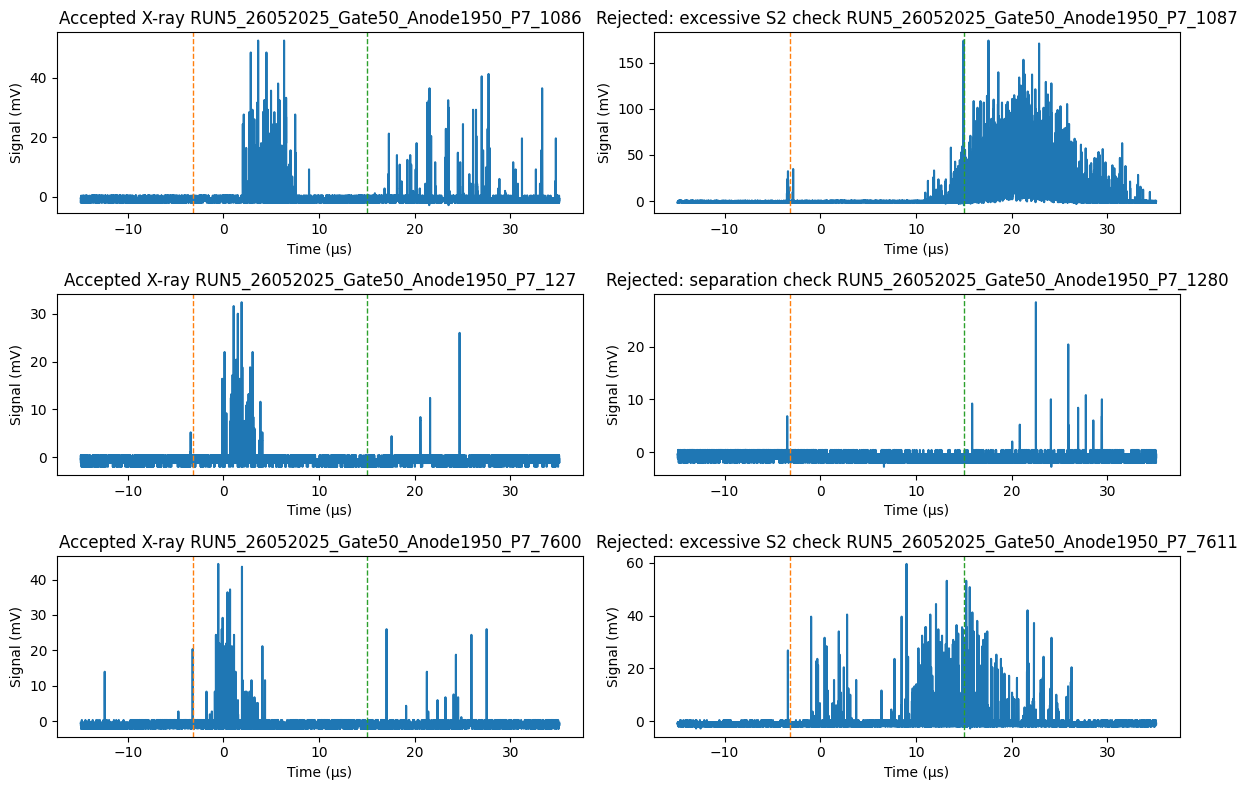

In [123]:
t_s1 = -3.2
s2_start = 15
i += 1
wfn3 = dataIO.load_wfm(wfm_paths[7330 + i])
fig, ax = plt.subplots(3, 2, figsize=(12, 8), )
plotting.plot_waveform(wfy, ax=ax[0,0], title='Accepted X-ray')
plotting.plot_waveform(wfn, ax=ax[0,1], title='Rejected: excessive S2 check')
plotting.plot_waveform(wfyy, ax=ax[1,0], title='Accepted X-ray')
plotting.plot_waveform(wfnn, ax=ax[1,1], title='Rejected: separation check')
plotting.plot_waveform(wfy3, ax=ax[2,0], title='Accepted X-ray')
plotting.plot_waveform(wfn3, ax=ax[2,1], title='Rejected: excessive S2 check')
for a in ax.flatten():
    a.axvline(t_s1, color='C1', ls='--', lw=1)
    a.axvline(s2_start, color='C2', ls='--', lw=1)
plt.tight_layout()

In [129]:
for wf in [wfy, wfn, wfyy, wfnn, wfy3, wfn3]:
    xre = xray_event_pipeline(wf, t_s1=t_s1, s2_start=s2_start, bs_threshold=2, max_area_s2=1e5,
                        min_s2_sep=1, min_s1_sep=1)
    print(xre.wf_id, xre.accepted, xre.reason)

# plotting.plot_waveform(pwf, title='Processed accepted X-ray')

RUN5_26052025_Gate50_Anode1950_P7_1086Wfm True ok
Area above baseline before S2: 1.70e+06 (max allowed 100000.0)
RUN5_26052025_Gate50_Anode1950_P7_1087Wfm False excessive S2 signal above baseline
RUN5_26052025_Gate50_Anode1950_P7_127Wfm True ok
RUN5_26052025_Gate50_Anode1950_P7_1280Wfm False no signal above baseline
RUN5_26052025_Gate50_Anode1950_P7_7600Wfm True ok
RUN5_26052025_Gate50_Anode1950_P7_7611Wfm False insufficient separation (t_pre_s2=0.01), (t_post_s1=2.24)


# Test at set level

In [143]:
set_50 = constructors.set_from_dir(meas_path)

In [148]:
xres50 = classify_xrays_set(set_50, t_s1=t_s1, s2_start=s2_start, bs_threshold=2, max_area_s2=1e5,
                        min_s2_sep=1, min_s1_sep=1)

Area above baseline before S2: 1.68e+05 (max allowed 100000.0)
Area above baseline before S2: 1.22e+05 (max allowed 100000.0)
Area above baseline before S2: 2.15e+06 (max allowed 100000.0)
Area above baseline before S2: 2.14e+06 (max allowed 100000.0)
Area above baseline before S2: 1.31e+06 (max allowed 100000.0)
Area above baseline before S2: 3.05e+06 (max allowed 100000.0)
Area above baseline before S2: 1.17e+05 (max allowed 100000.0)
Area above baseline before S2: 1.39e+06 (max allowed 100000.0)
Area above baseline before S2: 1.19e+05 (max allowed 100000.0)
Area above baseline before S2: 1.26e+05 (max allowed 100000.0)
Area above baseline before S2: 1.13e+05 (max allowed 100000.0)
Area above baseline before S2: 1.18e+05 (max allowed 100000.0)
Area above baseline before S2: 1.51e+05 (max allowed 100000.0)
Area above baseline before S2: 1.05e+05 (max allowed 100000.0)
Area above baseline before S2: 3.18e+06 (max allowed 100000.0)
Area above baseline before S2: 1.06e+06 (max allowed 10

In [162]:
xareas = np.array([xr.area for xr in xres50.events if xr.accepted])

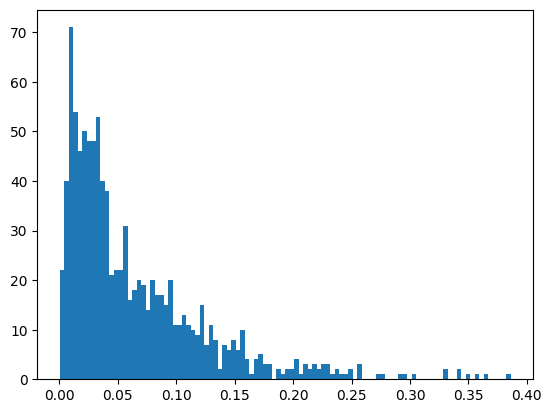

In [171]:
xcut = xareas[xareas < 0.4]
plt.hist(xcut, bins=100);

# Test at run level

In [10]:
run5 = Run(
    root_directory = base_dir,
    run_id = "RUN5",
    el_field = 2375,            # V/cm
    target_isotope = "Th228",
    pressure = 2.0,             # bar
    temperature = 297,          # K
    sampling_rate = 1e9,
    el_gap = 0.8,               # cm
    drift_gap = 1.4,            # cm

    width_s2 = 20                # µs 
)

run5 = constructors.populate_run(run5)
run5 = transport.with_gas_density(run5)

run5.gas_density

4.877421222922505e+19

In [11]:
def prepare_set(s: SetPmt, run: Run) -> SetPmt:
    s1 = constructors.estimate_s1_from_batches(s, n_batches=20, batch_size=20, flag_plot=False)
    s1 = constructors.set_fields(s1, drift_gap_cm=run.drift_gap, el_gap_cm=run.el_gap, gas_density=run.gas_density)
    s1 = constructors.set_transport_properties(s1, drift_gap_cm=run.drift_gap, transport=None)
    return s1

run5 = replace(run5, sets=[prepare_set(s, run5) for s in run5.sets])

In [12]:
for set in run5.sets:
    if set.metadata['t_s1'] < -3.7:
        set.metadata['t_s1'] = -3.2

In [22]:
intconfig_xrays = config.IntegrationConfig(
    bs_threshold = 2,          # mV
    max_area_s2 = 1e5,        # mV·µs
    min_s2_sep = 1,            # µs
    min_s1_sep = 1,            # µs
    n_pedestal = 200,          # samples
    ma_window = 10,            # samples
    threshold = 1,             # mV
    dt = 2e-4,                    # ns
)
results_run5 = classify_xrays_run(run5, ts2_tol = -0.2, 
                                          config=intconfig_xrays)

Processing x-rays in set /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode1950V_Gate50V in drift window: (-3.2, np.float64(16.5755956679796))
Area above baseline before S2: 1.48e+05 (max allowed 100000.0)
Area above baseline before S2: 1.05e+05 (max allowed 100000.0)
Area above baseline before S2: 2.07e+06 (max allowed 100000.0)
Area above baseline before S2: 1.79e+06 (max allowed 100000.0)
Area above baseline before S2: 1.11e+06 (max allowed 100000.0)
Area above baseline before S2: 2.93e+06 (max allowed 100000.0)
Area above baseline before S2: 1.14e+05 (max allowed 100000.0)
Area above baseline before S2: 1.07e+06 (max allowed 100000.0)
Area above baseline before S2: 1.06e+05 (max allowed 100000.0)
Area above baseline before S2: 1.11e+05 (max allowed 100000.0)
Area above baseline before S2: 1.06e+05 (max allowed 100000.0)
Area above baseline before S2: 1.16e+05 (max allowed 100000.0)
Area above baseline before S2: 2.68e+06 (max allow

KeyboardInterrupt: 

In [20]:
results_run5['FieldScan_5GSsec_Anode1950V_Gate50V']

S2Areas(source_dir=FieldScan_5GSsec_Anode1950V_Gate50V, n_areas=10000, method=s2_area_pipeline)

In [18]:
for xr in results_run5:
    dataIO.store_xray_results(xr)

AttributeError: 'str' object has no attribute 'source_dir'